# Set up enviroment

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Start

In [3]:
from sklearn.linear_model import LinearRegression

def buildModel():
  model = LinearRegression()
  return model

## Reading dataset

In [4]:
dataset_path = '/content/drive/MyDrive/UIT/IS403/Source_Code_PTDLKD/Data Train 1-3-2019 1-3-2024/BIDV.csv'
df = pd.read_csv(dataset_path, index_col="Date")


In [5]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
3/1/2019,23001.22852,23354.00781,23001.22852,23177.61914,23177.61914,1634348
3/4/2019,23354.00781,23812.62109,23283.45313,23706.78906,23706.78906,1375277
3/5/2019,23424.56445,24906.23828,23424.56445,24412.34766,24412.34766,5974891
3/6/2019,24412.34766,24624.01563,24271.23633,24518.18164,24518.18164,2411789
3/7/2019,24694.57031,24870.96094,24482.90234,24624.01563,24624.01563,2413192
3/8/2019,24306.51367,24482.90234,23918.45508,23989.01172,23989.01172,2563866
3/11/2019,24059.56836,24059.56836,23600.95508,23742.06641,23742.06641,1611841
3/12/2019,24059.56836,25047.34961,23847.90039,25047.34961,25047.34961,2395971
3/13/2019,24906.23828,25364.85156,24835.68359,25117.90625,25117.90625,4054826


In [6]:
print(f"Data shape: {df.shape}")

Data shape: (1251, 6)


## Data preprocessing

### Checking duplicates and null values

In [7]:
print("Duplicated")
df.duplicated().sum()

Duplicated


0

In [8]:
print("Null")
df.isnull().sum()

Null


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Checking DataFrame information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1251 entries, 3/1/2019 to 3/1/2024
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1251 non-null   float64
 1   High       1251 non-null   float64
 2   Low        1251 non-null   float64
 3   Close      1251 non-null   float64
 4   Adj Close  1251 non-null   float64
 5   Volume     1251 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.4+ KB


### Overview Data Descriptive statistic

In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1.251000e+03
mean,32478.152436,32953.583896,32049.788025,32488.866039,32488.866039,2.259783e+06
std,6070.015773,6142.073892,6005.553272,6074.542780,6074.542780,1.666240e+06
min,21590.111330,22225.113280,20813.996090,21590.111330,21590.111330,1.837970e+05
25%,28222.367190,28610.423830,27922.503905,28222.367190,28222.367190,1.163729e+06
50%,31044.603520,31432.660160,30437.482420,31009.326170,31009.326170,1.789686e+06
75%,37447.867190,37935.931640,36871.062500,37381.310545,37381.310545,2.805575e+06
max,53900.000000,54800.000000,53000.000000,53900.000000,53900.000000,1.846408e+07


## Linear Regression Model

### Split Data

In [11]:
df.reset_index(inplace=True)

features = df.index
target = df['Close']

def splitTrainTest(test_ratio):
    n_observations = len(df)

    train_size = int((1-test_ratio) * n_observations)
    test_size = n_observations - train_size

    x_train, x_test = (
        np.array(features[:train_size]).reshape(-1, 1),
        np.array(features[train_size:train_size + test_size]).reshape(-1, 1)
    )
    y_train, y_test = target[:train_size], target[train_size:train_size + test_size]

    return x_train, x_test, y_train, y_test

In [12]:
def makePlots(data):
    (test_ratio, x_train, y_train, x_test, y_test, y_pred, x_next_30_days, y_next_30_days) = data

    figname = f'BIDV__{int(10-test_ratio*10)}-{int(test_ratio*10)}'
    plt.title(figname)
    plt.xlabel('Index')
    plt.ylabel('Price')

    # train
    plt.plot(x_train, y_train)

    # test
    plt.plot(x_test, y_test)
    plt.plot(x_test, y_pred)

    # next 30 days
    plt.plot(x_next_30_days, y_next_30_days)

    # save plots and show
    plt.legend(['Train', 'Test', 'Predictions (Test)','Predictions (Next30Days)'])
    # plt.savefig("plots/%s.png" % figname,bbox_inches='tight')
    plt.show()

In [13]:
def evaluateAccuracy(y_test, y_pred):
    test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
    print('Testing RMSE:', test_rmse)

    test_mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
    print('Testing MAPE:', test_mape)

    test_mae = np.mean(abs(y_pred - y_test))
    print('Testing MAE:', test_mae)

In [14]:
# train:test 9:1 8:2 7:3
test_ratio = 0.1

print("==============================")
print('Test Ratio: ', test_ratio)

#====Start-Linear-Regression-model====#
# split train test by test_ratio
x_train, x_test, y_train, y_test= splitTrainTest(test_ratio)

print("Train: ", x_train.shape)
print("Test: ", x_test.shape)

# create linear regression model
model = buildModel()
model.fit(x_train, y_train)

# make prediction
y_pred = model.predict(x_test)

# compare actual and predicted price
comparison_data = {'Actual_Price':y_test, 'Predicted_Price':y_pred}
comparison_table = pd.DataFrame(comparison_data)
print(comparison_table)

# evaluate accuracy
evaluateAccuracy(y_test, y_pred)
#====End-Linear-Regression-model====#



#====Start-Predick-next-30-days====#
print("==============================")
last_index =  df.index[-1]
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
print("Next 30 Days:")
print(y_next_30_days)
#====End-Predick-next-30-days====#

Test Ratio:  0.1
Train:  (1125, 1)
Test:  (126, 1)
      Actual_Price  Predicted_Price
1125   40287.51563     38204.282293
1126   40642.46875     38216.339386
1127   40997.42578     38228.396479
1128   41662.96875     38240.453572
1129   42151.03516     38252.510665
...            ...              ...
1246   53600.00000     39663.190561
1247   53000.00000     39675.247654
1248   53900.00000     39687.304747
1249   53000.00000     39699.361841
1250   53500.00000     39711.418934

[126 rows x 2 columns]
Testing RMSE: 5467.463589714508
Testing MAPE: 0.08909192747019351
Testing MAE: 4056.826104257744
Next 30 Days:
[39723.47602688 39735.53312001 39747.59021314 39759.64730626
 39771.70439939 39783.76149252 39795.81858565 39807.87567878
 39819.93277191 39831.98986503 39844.04695816 39856.10405129
 39868.16114442 39880.21823755 39892.27533068 39904.3324238
 39916.38951693 39928.44661006 39940.50370319 39952.56079632
 39964.61788945 39976.67498257 39988.7320757  40000.78916883
 40012.84626196 4

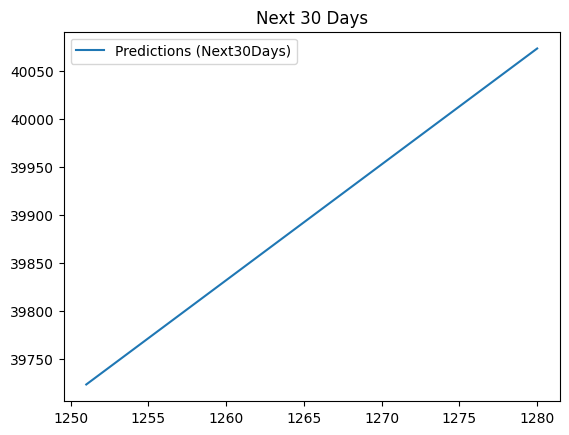

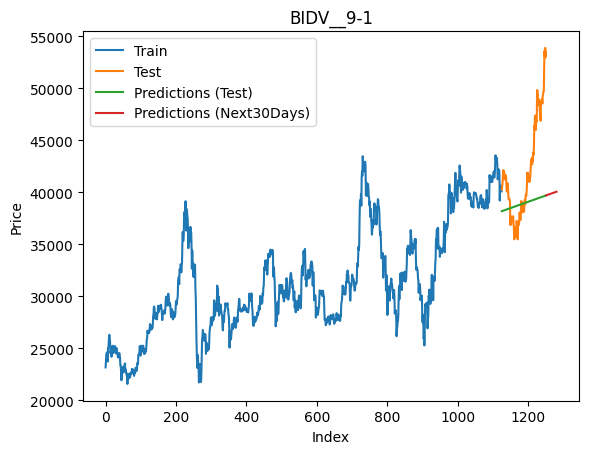

In [15]:
# use plots to display data
# next 30 days
plt.title("Next 30 Days")
plt.plot(x_next_30_days, y_next_30_days)
plt.legend(['Predictions (Next30Days)'])
plt.show()
# all
makePlots((test_ratio, x_train , y_train, x_test, y_test, y_pred, x_next_30_days, y_next_30_days))